# The Red House Beer Tasting

## Load in libraries

In [1]:
import hypertools as hyp
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_context('poster')

## Load in data and check it out

In [2]:
beer = pd.read_csv('beer_ratings.csv', index_col='NAME')
beer.head()

,the crisp: can appearance,the crisp: beer appearance,the crisp: aroma,the crisp: mouth feel,the crisp: taste,the crisp: overall,oarsman: can appearance,oarsman: beer appearance,oarsman: aroma,oarsman: mouth feel,...,troegs: aroma,troegs: mouth feel,troegs: taste,troegs: overall,ommengang: can appearance,ommengang: beer appearance,ommengang: aroma,ommengang: mouth feel,ommengang: taste,ommengang: overall
NAME,,,,,,,,,,,,,,,,,,,,,
emily,8,4,3,5,6,6,10,3,2,4,...,5,7.0,8.0,8.5,6,7,5,8,8,9
sarah,4,4,6,7,6,6,10,2,5,4,...,8,7.0,9.0,8.5,5,8,8,7,8,8
alexa,7,2,2,4,5,5,10,2,2,4,...,3,5.0,6.0,5.0,6,3,6,6,2,3
ben,5,8,6,7,7,7,9,6,5,5,...,8,7.4,8.2,8.3,5,9,8,8,9,9
andy,5,3,7,7,6,6,10,2,3,5,...,9,8.0,9.0,9.0,7,6,8,9,7,7


## Flatten the data

In [3]:
flat_beer=[]
for row in beer.index:
    for col in beer.columns:
        flat_beer.append([row,col.split(':')[0],col.split(':')[1],beer.loc[row,col]])
flat_beer = pd.DataFrame(flat_beer,columns=['name','beer','attr','value'])
flat_beer.head()

,name,beer,attr,value
0,emily,the crisp,can appearance,8.0
1,emily,the crisp,beer appearance,4.0
2,emily,the crisp,aroma,3.0
3,emily,the crisp,mouth feel,5.0
4,emily,the crisp,taste,6.0


## Average beer rating across all dimensions

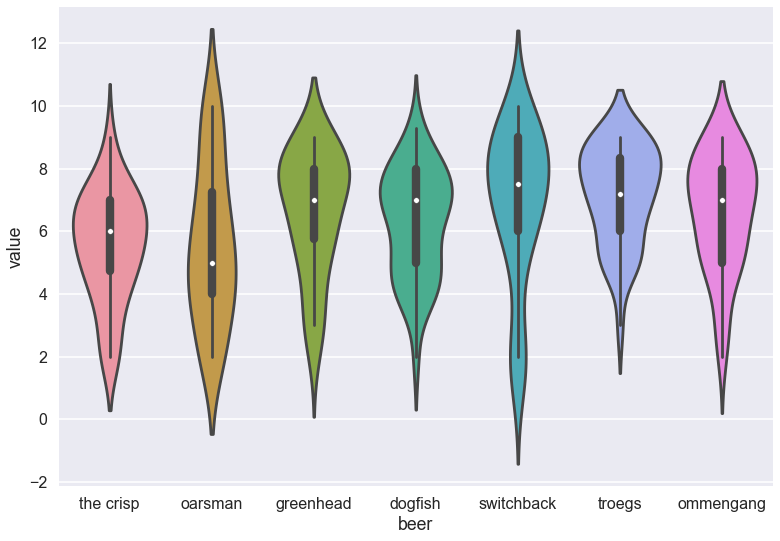

In [4]:
sns.violinplot(data=flat_beer,x='beer',y='value')

## Can appearance

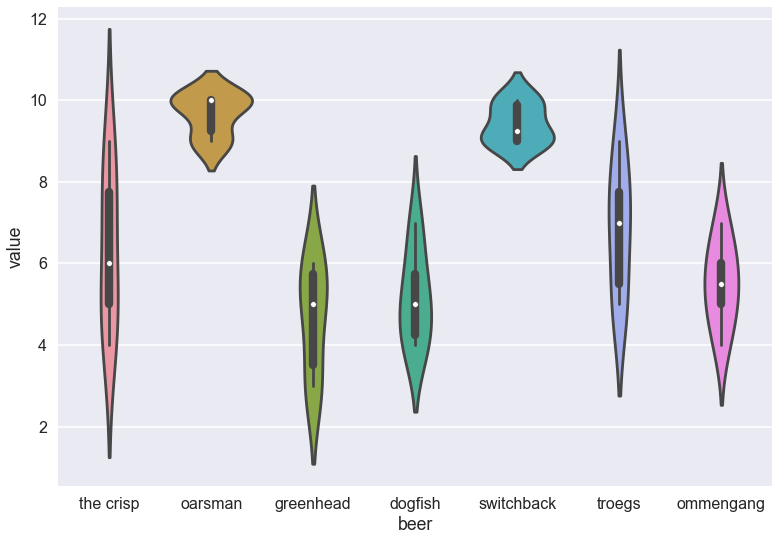

In [5]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' can appearance'],x='beer',y='value')

## Beer appearance

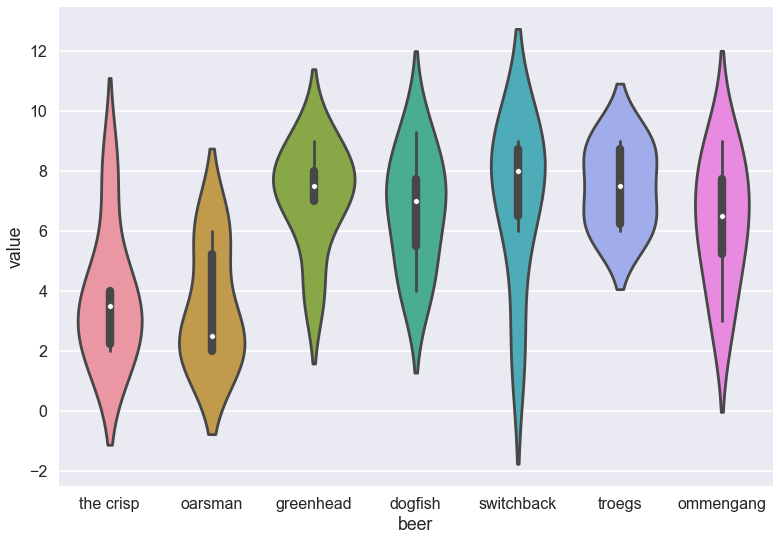

In [6]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' beer appearance'],x='beer',y='value')

## Aroma

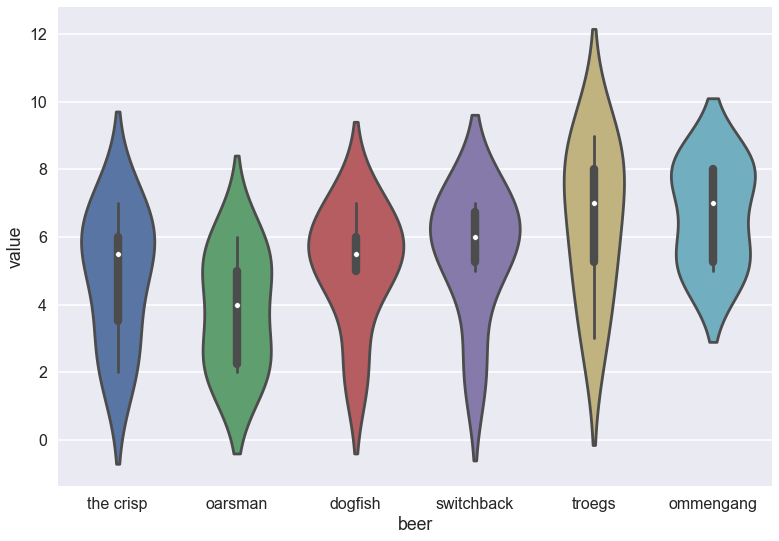

In [7]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' aroma'],x='beer',y='value')

## Mouth feel

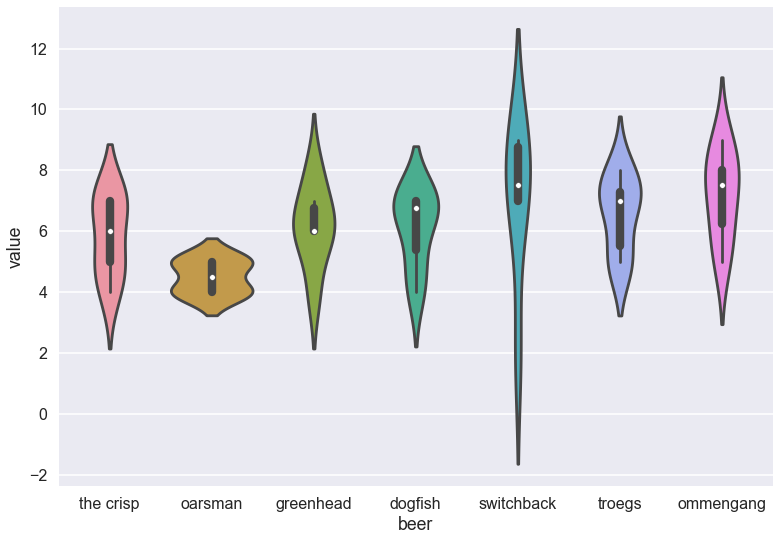

In [8]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' mouth feel'],x='beer',y='value')

## Taste

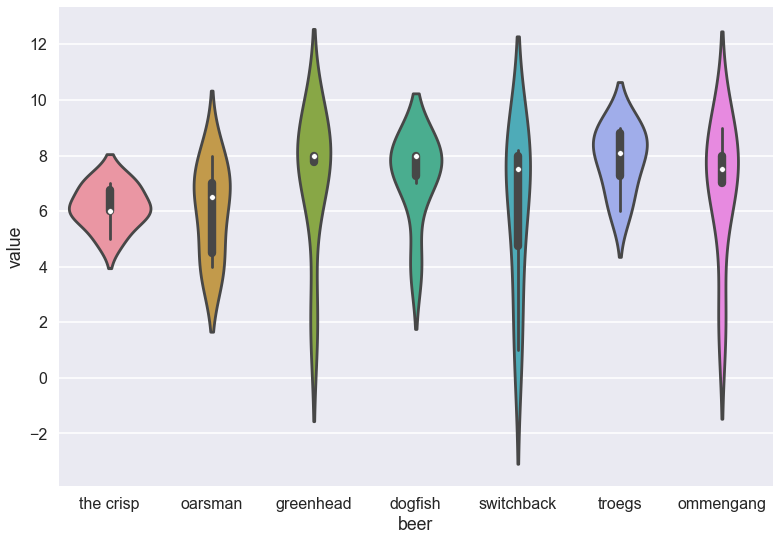

In [9]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' taste '],x='beer',y='value')

## Overall

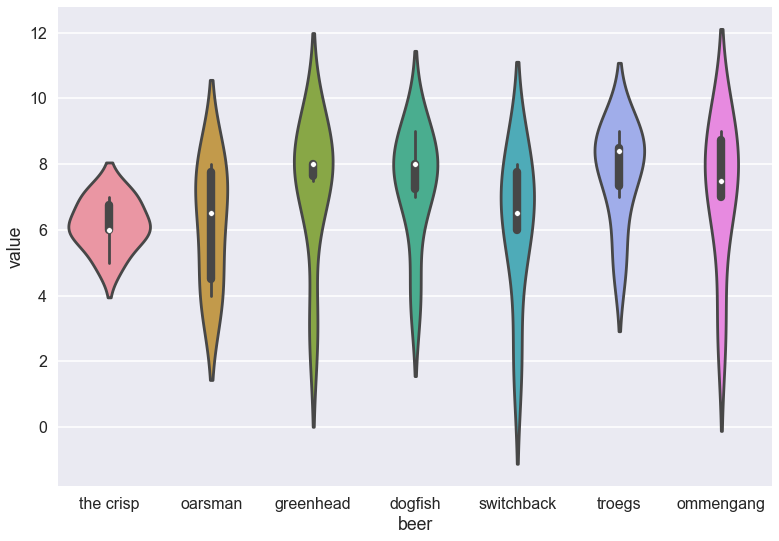

In [10]:
sns.violinplot(data=flat_beer[flat_beer['attr']==' overall'],x='beer',y='value')

## Average beer drinker rating

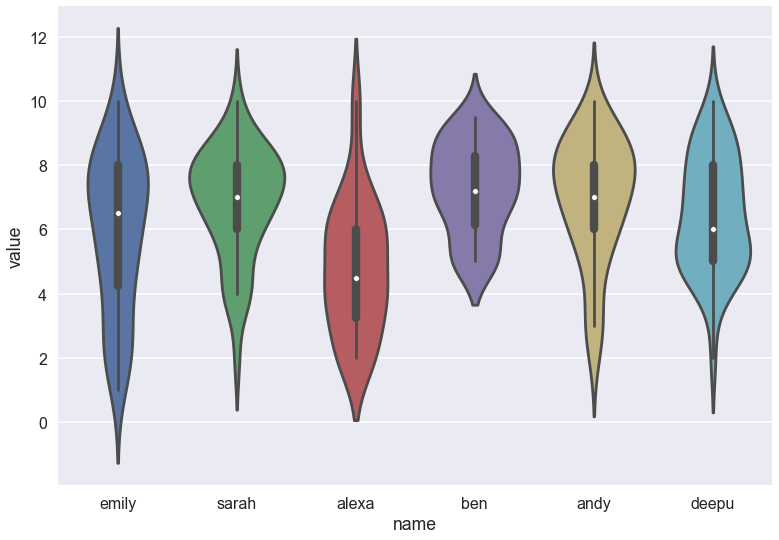

In [11]:
sns.violinplot(data=flat_beer, x='name', y='value')

## Average over dimensions by beer and drinker

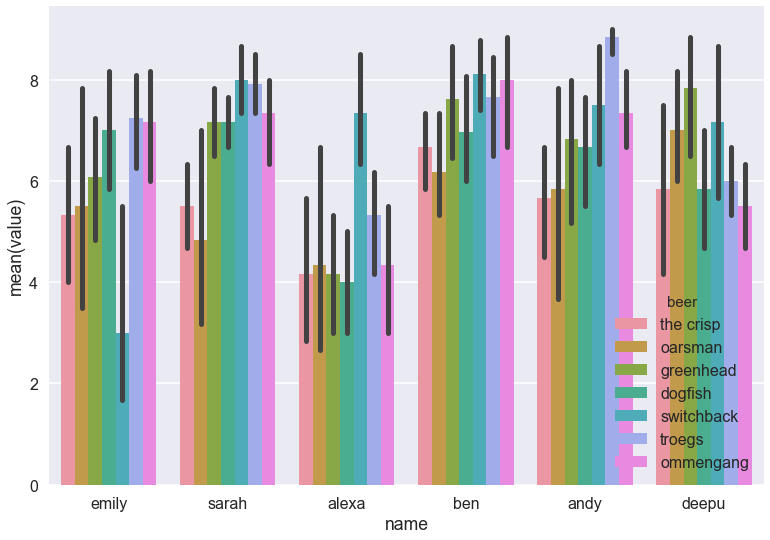

In [12]:
sns.barplot(data=flat_beer, x='name', y='value', hue='beer')

## Similarity of beer drinker preferences

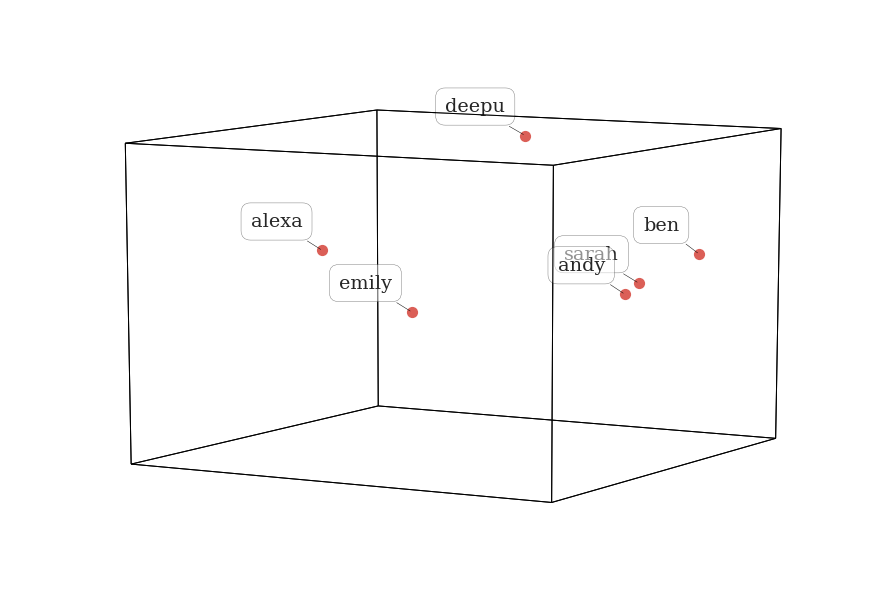

In [13]:
_, _, _, _ = hyp.plot(beer, 'o', labels=list(beer.index))

## Beer drinker preferences correlation matrix

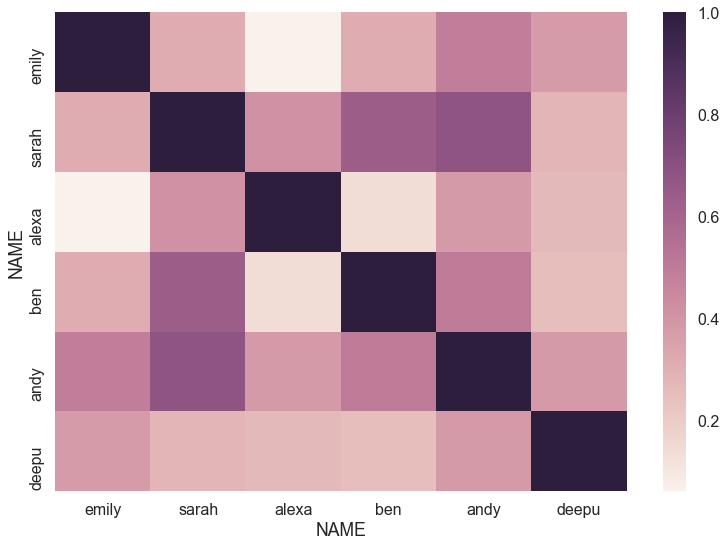

In [14]:
sns.heatmap(beer.T.corr())

## Similarity between preferences plotted with MDS

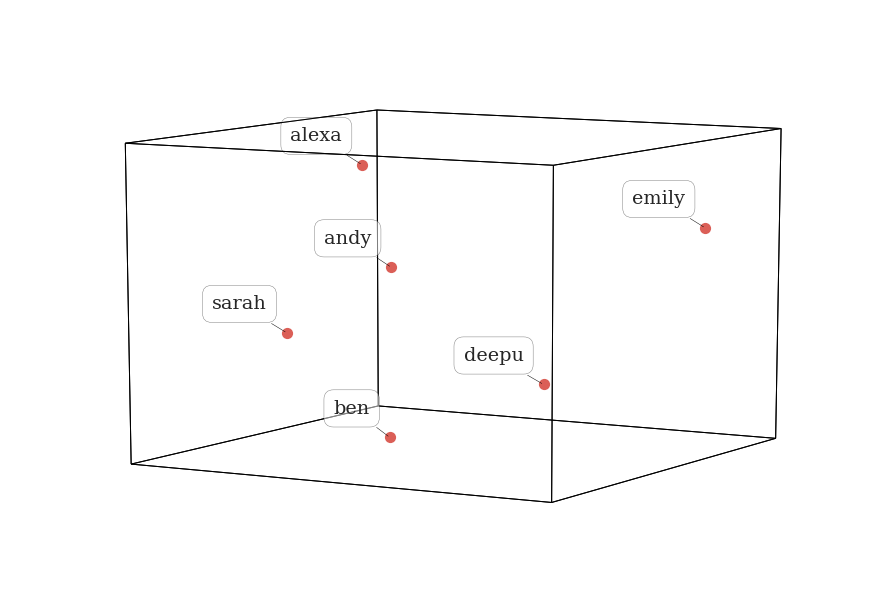

In [15]:
_, _, _, _ = hyp.plot(beer,'o', model='MDS', labels=list(beer.index))

## Average over all beer dimensions, plotted by beer and colored by person

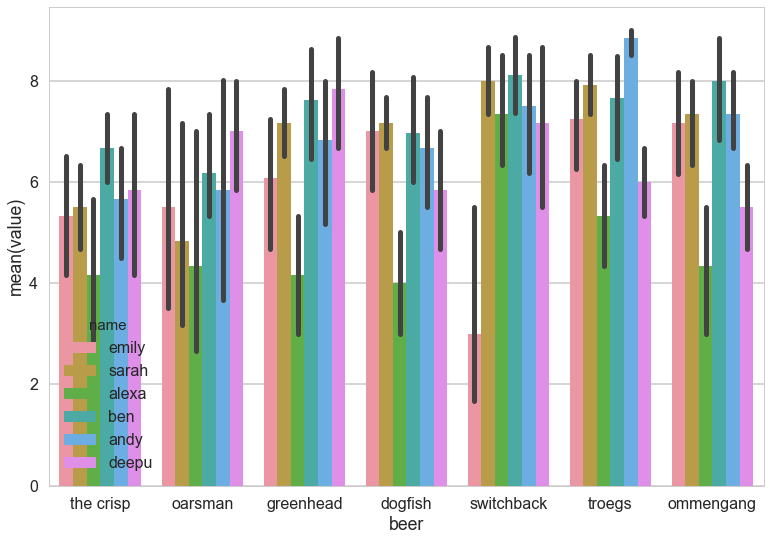

In [16]:
sns.barplot(data=flat_beer,x='beer',y='value', hue='name')

## Beer to beer correlation matrix

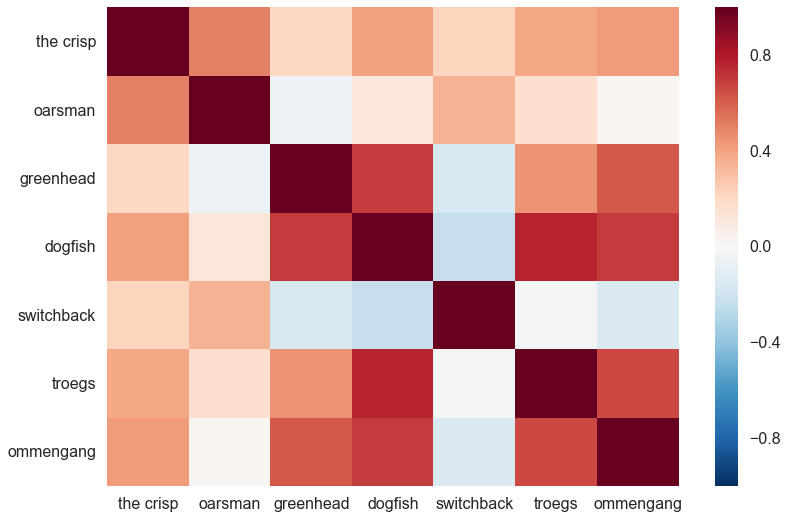

In [17]:
beer_features=pd.DataFrame([flat_beer[flat_beer['beer']==beer]['value'].values for beer in flat_beer['beer'].unique()],index=flat_beer['beer'].unique())
sns.heatmap(beer_features.T.corr())

## Beer vectors (each vector is ratings for all dimensions for each person, separately for each beer)

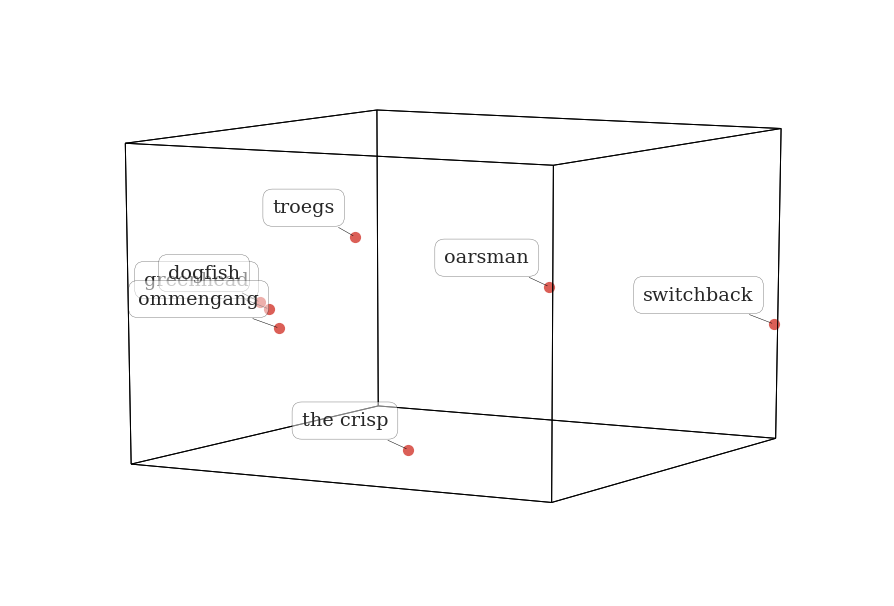

In [18]:
_, _, _, _ = hyp.plot(beer_features,'o', labels=list(beer_features.index))

## MDS version of the plot above

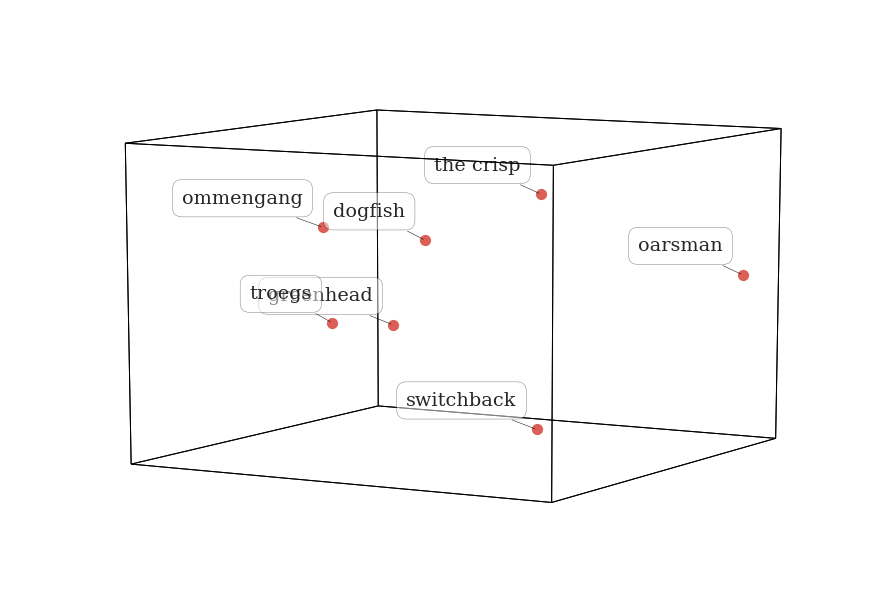

In [19]:
_, _, _, _ = hyp.plot(beer_features,'o', model='MDS', labels = list(beer_features.index))